# McCulloch and Pitts Neuron

Publication: [A logical calculus of the ideas immanent in nervous activity](https://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf)

In [2]:
import numpy as np

class LogicNeuron:
    @classmethod
    def AND(self, *args):
        return np.prod(np.array(args), axis=0)
    
    @classmethod
    def NOT(self, input):
        return abs(np.array(input) - 1)
    
    @classmethod
    def NAND(self, *args):
        return self.NOT(self.AND(*args))
    
    @classmethod
    def OR(self, *args):
        return self.NAND(*self.NOT(args))
    
    @staticmethod
    def prettify(inputs, output):
        for index, input in enumerate(inputs):
            print(f"| Input {index}: {input} |")
        print(f"| Output : {output} |")

In [349]:
a = np.array([1, 0, 1, 0, 1])
b = np.array([1, 1, 0, 0, 1])
c = np.array([1, 1, 0, 0, 0])

print("Testing AND Operator")
result_and = LogicNeuron.AND(a, b, c)
LogicNeuron.prettify([a, b, c], result_and)

Testing AND Operator
| Input 0: [1 0 1 0 1] |
| Input 1: [1 1 0 0 1] |
| Input 2: [1 1 0 0 0] |
| Output : [1 0 0 0 0] |


In [350]:
print("Testing NOT Operator")
result_not = LogicNeuron.NOT(result_and)
LogicNeuron.prettify([result_and], result_not)

Testing NOT Operator
| Input 0: [1 0 0 0 0] |
| Output : [0 1 1 1 1] |


In [351]:
print("Testing NAND Operator")
result_nand = LogicNeuron.NAND(a, b, c)
LogicNeuron.prettify([a, b, c], result_nand)

Testing NAND Operator
| Input 0: [1 0 1 0 1] |
| Input 1: [1 1 0 0 1] |
| Input 2: [1 1 0 0 0] |
| Output : [0 1 1 1 1] |


In [352]:
print("Testing OR Operator")
result_or = LogicNeuron.OR(a, b, c)
LogicNeuron.prettify([a, b, c], result_or)

Testing OR Operator
| Input 0: [1 0 1 0 1] |
| Input 1: [1 1 0 0 1] |
| Input 2: [1 1 0 0 0] |
| Output : [1 1 1 0 1] |


<center>
    <img src="./assets/logic-gates.svg"/>
    <br>
    <i>Description here. (Source: Source here)</i>
</center>

In [353]:
def bitwise_sum(a: int, b: int):
    n = LogicNeuron()
    nand_1 = n.NAND(x1, x2)
    nand_2 = n.NAND(x1, nand_1)
    nand_3 = n.NAND(nand_2, x2)
    output = n.NAND(nand_2, nand_3)
    carry_bit = n.NAND(nand_1, nand_1)
    return output, carry_bit

x1 = 1
x2 = 1
sum_result, carry_bit = bitwise_sum(x1, x2) 

print(f"Bit x1: \t{x1}")
print(f"Bit x2: \t{x2}")
print(f"Output bit: \t{sum_result}")
print(f"Carry bit: \t{carry_bit}")

Bit x1: 	1
Bit x2: 	1
Output bit: 	1
Carry bit: 	1


# The Perceptron (Frank Rosenblatt)

Frank Rosenblatt [The Perceptron (publication)](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf)

In [5]:
from numpy import random

def unit_step(input, value=1) -> int:
    """ Also known as Heaviside step function
    
    TODO: Handle cases where the input is an array
    """
    return np.heaviside(input, value) # numpy version
    if (input < 0):
        return 0
    elif (input == 0):
        return 0
    else:
        return 1

class Perceptron:
    
    def __init__(self, n_inputs: int) -> None:
        """
        TODO: implement fit
        """
        # random.seed(0)  # uncomment for consistent outputs
        self.n_inputs = n_inputs
        self.B = 0 # set bias term to zero
        self.W = random.randn(n_inputs) # Weights initialization
        self.output = None

    def forward(self, X: np.array) -> float:
        self.X = X
        self.W_sum = self.__weights_sum(self.X, self.W)
        self.output = self.__act_function()
        return self.output

    def __weights_sum(self, X: np.array, W: np.array) -> np.ndarray:
        return np.sum(np.transpose(X) * W + self.B)
    
    def __act_function(self) -> float:
        return unit_step(self.W_sum, 1)

## Perceptron Implemented as NAND

<center>
    <img src="./assets/perceptron-nand.svg"/>
    <br>
</center>

In [374]:
# Perceptron implemented as NAND
NAND_per = Perceptron(2) # init perceptron with 2 inputs
NAND_per.W = np.array([-2, -2]) # set all weights to -2

# Create a set of two bit for testing
x1 = 0
x2 = 0
input = np.array([x1, x2])

# Feed forward the Perceptron
output = NAND_per.forward(input)

# Print results
print(f"Input x1: \t{x1}")
print(f"Input x2: \t{x2}")
print(f"Output (NAND): {output}")

Input x1: 	0
Input x2: 	0
Output (NAND): 1.0


<center>
    <img src="./assets/perceptron-bitwise-sum.svg"/>
    <br>
    <i>Description here. (Source: Source here)</i>
</center>

In [104]:
N_INPUTS = 4
X = random.randn(N_INPUTS)
myPerceptron = Perceptron(N_INPUTS)
y_hat = myPerceptron.forward(X)

print(f"Input values: \t{X}")
print(f"Weights: \t{myPerceptron.W}")
print(f"Bias: \t\t{myPerceptron.B}")
print(f"Weights Sum: \t{myPerceptron.W_sum}")
print(f"Output: \t{y_hat}")

Input values: 	[ 0.01851177 -0.63415234 -0.39185155  1.72117958]
Weights: 	[ 0.55643757 -1.12232679 -0.29831045 -1.57783788]
Bias: 		0
Weights Sum: 	-1.876822126354988
Output: 	0.0


In [189]:
class Dense(object):
    def __init__(self, n_inputs, units=2):
        """
        """
        self.n_inputs = n_inputs
        self.X = X
        self.units = units
        self.perceptrons = np.array(self.__init_perceptrons())
        self.B = np.array(self.__init_biases())
        self.W = np.array(self.__init_weights())
        self.outputs = None

    def __init_biases(self) -> np.array:
        B = []
        for index in range(self.units):
            B.append(self.perceptrons[index].B)
        return B

    def forward(self, X: np.array) -> np.array:
        out = []
        for index in range(self.units):
            out.append(self.perceptrons[index].forward(X))
        self.outputs = np.array(out)
        return self.outputs
    
    def __init_perceptrons(self):
        perceptrons = []
        for _ in range(self.units):
            perceptrons.append(Perceptron(self.n_inputs))
        return perceptrons
    
    def __init_weights(self):
        W = []
        for index in range(self.units):
            W.append(self.perceptrons[index].W)
        return W

n_inputs = 4
X = random.randn(n_inputs)
layer = Dense(n_inputs, units=2)
print(layer.perceptrons)
print(f"Bias: \t\t{layer.B}")
print(f"Weights: \t{layer.W}")
print(f"Outputs: \t{layer.forward(X)}")

Bias: 		[0 0]
Weights: 	[[-0.60183389 -0.45824963 -0.39333882 -0.51303872]
 [-0.42913903 -0.60364052 -0.9095941  -1.197419  ]]
Outputs: 	[1. 1.]


Perceptron classification accuracy 0.0


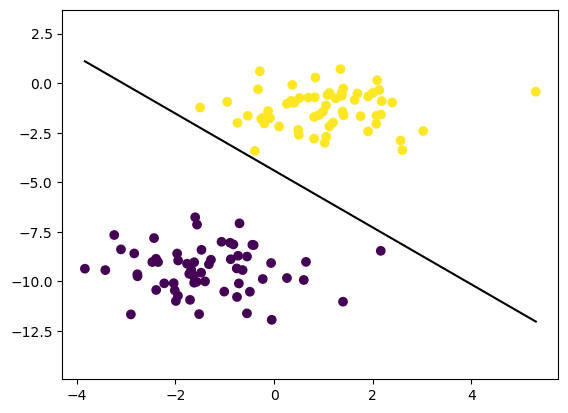

In [1]:
# Implementing a dense layer

from turtle import update
import numpy as np

def unit_step(x):
    return np.where(x>0, 1, 0)

class DenseLayer:

    def __init__(self, learning_rate=0.001, n_iter=1000) -> None:
        self.eta = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init weights
        self.weights = np.random.randn(n_features)
        self.bias = 0

        y_ = unit_step(y)

        for _ in range (self.n_iter):
            for index, x_i in enumerate(X):
                linear_out = np.dot(x_i, self.weights) + self.bias
                y_hat = unit_step(linear_out)

                update = self.eta * (y_[index] - y_hat)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_out = np.dot(X, self.weights) + self.bias
        y_hat = unit_step(linear_out)


# Imports
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

p = DenseLayer(learning_rate=0.01, n_iter=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()